In [16]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
scale_file =  '/home/ck/DIR/cornkle/MCSfiles/blob_map_allscales_-50_JJAS_points_dominant.nc'
tir_file = '/home/ck/DIR/cornkle/MCSfiles/blob_map_MCSs_-40-75000_JJAS_-50-points_dominant.nc'

In [3]:
scale_ds = xr.open_dataarray(scale_file)
tir_ds = xr.open_dataarray(tir_file)

pick_time = pd.to_datetime('2006-08-07_18', format='%Y-%m-%d_%H')

In [7]:
scale_pick = scale_ds.sel(time=pick_time, method='nearest')
tir_pick = tir_ds.sel(time=scale_pick.time)

In [11]:
"""
Find all indices within the local circle of radius
Input:
x: x index of center point
y: y index of center point
radius: radius in pixels, floats are handled including the farthest point
Returns a tuple of (y index, x index)
"""
def draw_circle(x, y, radius):

    xloc1 = np.arange(x - radius, x + radius + 1)
    yloc1 = np.arange(y - radius, y + radius + 1)
    xloc, yloc = np.meshgrid(xloc1, yloc1)
    distloc = ( ((xloc - x) * (xloc - x)) + ((yloc - y) * (yloc - y)) )**.5

    indloc = (distloc <= radius).nonzero()
    ycirc = indloc[0] - radius + y
    xcirc = indloc[1] - radius + x

    return (ycirc, xcirc)

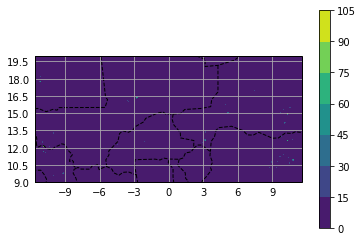

In [19]:
f=plt.figure()
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(scale_pick.lon, scale_pick.lat, scale_pick, transform=ccrs.PlateCarree())
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.colorbar()

In [ ]:
for pix in scale_pick:
    if pix == 0: continue
    
